In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import time 
from sklearn.ensemble import GradientBoostingRegressor
import shap
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from scipy.stats import shapiro
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Prediction pour la variable SiteEnergyUse(kBtu)

In [58]:
data = pd.read_csv("2016_Building_Energy_Benchmarking_clean.csv" )

In [59]:
data = data.drop(columns = ["Unnamed: 0"], axis =1)

In [60]:
data

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,Neighborhood,NumberofBuildings,ENERGYSTARScore,SiteEnergyUse(kBtu),...,Commercial,Hotel / Restaurant,Industrial,Loisirs,Public,Residential,Santé,Scolaire,Service,industrial
0,NonResidential,Hotel / Restaurant,1927,12,88434,Hotel / Restaurant,DOWNTOWN,1.0,60.0,7.226362e+06,...,0,1,0,0,0,0,0,0,0,0
1,NonResidential,Hotel / Restaurant,1996,11,103566,Hotel / Restaurant,DOWNTOWN,1.0,61.0,8.387933e+06,...,0,1,0,0,0,0,0,0,0,0
2,NonResidential,Hotel / Restaurant,1969,41,956110,Hotel / Restaurant,DOWNTOWN,1.0,43.0,7.258702e+07,...,0,1,0,0,0,0,0,0,0,0
3,NonResidential,Hotel / Restaurant,1926,10,61320,Hotel / Restaurant,DOWNTOWN,1.0,56.0,6.794584e+06,...,0,1,0,0,0,0,0,0,0,0
4,NonResidential,Hotel / Restaurant,1980,18,175580,Hotel / Restaurant,DOWNTOWN,1.0,75.0,1.417261e+07,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,Nonresidential COS,Bureau,1990,1,12294,Bureau,GREATER DUWAMISH,1.0,46.0,8.497457e+05,...,0,0,0,0,0,0,0,0,0,0
1655,Nonresidential COS,Autre,2004,1,16000,Loisirs,DOWNTOWN,1.0,NaN,9.502762e+05,...,0,0,0,1,0,0,0,0,0,0
1656,Nonresidential COS,Autre,1974,1,13157,Loisirs,MAGNOLIA / QUEEN ANNE,1.0,NaN,5.765898e+06,...,0,0,0,1,0,0,0,0,0,0
1657,Nonresidential COS,Autre,1989,1,14101,Loisirs,GREATER DUWAMISH,1.0,NaN,7.194712e+05,...,0,0,0,1,0,0,0,0,0,0


In [61]:
def missing_values_by_column1(data):
    # Utiliser la méthode "isnull" pour identifier les valeurs manquantes
    missing_values = data.isnull()
    # Appliquer la méthode "sum" par colonne pour compter les valeurs manquantes par colonne
    missing_values_count = missing_values.sum()
    return missing_values_count

In [62]:
missing_values_by_column1(data)

BuildingType                0
PrimaryPropertyType         0
YearBuilt                   0
NumberofFloors              0
PropertyGFATotal            0
LargestPropertyUseType      0
Neighborhood                0
NumberofBuildings           0
ENERGYSTARScore           569
SiteEnergyUse(kBtu)         0
TotalGHGEmissions           0
distance                    0
Autre                       0
Bureau                      0
Commercial                  0
Hotel / Restaurant          0
Industrial                  0
Loisirs                     0
Public                      0
Residential                 0
Santé                       0
Scolaire                    0
Service                     0
industrial                  0
dtype: int64

In [63]:
data2 = data.drop(columns = ["ENERGYSTARScore"])


In [64]:
data2 = data[['YearBuilt','NumberofFloors','PropertyGFATotal','NumberofBuildings','SiteEnergyUse(kBtu)','TotalGHGEmissions','distance','Autre','Bureau','Commercial','Industrial','Santé','Scolaire','Hotel / Restaurant','Loisirs','Public','Residential','Service']]


In [65]:
def scale_float_columns(df):
    # Récupérer les colonnes ne contenant que des valeurs flottantes
    float_cols = data2[['YearBuilt','NumberofFloors','PropertyGFATotal','NumberofBuildings','distance','Autre','Bureau','Commercial','Industrial','Santé','Scolaire','Hotel / Restaurant','Loisirs','Public','Residential','Service']]

    # Instancier le StandardScaler
    scaler = StandardScaler()

    # Mettre à l'échelle les colonnes de données flottantes
    scaled_values = scaler.fit_transform(float_cols)

    # Transformer les données mises à l'échelle en dataframe
    scaled_cols = pd.DataFrame(scaled_values, columns=float_cols.columns)

    # Remplacer les colonnes d'origine par les colonnes mises à l'échelle dans le dataframe d'origine
    df[float_cols.columns] = scaled_cols

In [66]:
scale_float_columns(data2)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [67]:
data2

,YearBuilt,NumberofFloors,PropertyGFATotal,NumberofBuildings,SiteEnergyUse(kBtu),TotalGHGEmissions,distance,Autre,Bureau,Commercial,Industrial,Santé,Scolaire,Hotel / Restaurant,Loisirs,Public,Residential,Service
0,-1.068757,1.289259,-0.101102,-0.068317,7.226362e+06,249.98,-1.021813,-0.371295,-0.656815,-0.322168,-0.435026,-0.243694,-0.338998,4.150996,-0.222117,-0.081699,-0.155158,-0.163122
1,1.041674,1.126433,-0.050044,-0.068317,8.387933e+06,295.86,-0.935773,-0.371295,-0.656815,-0.322168,-0.435026,-0.243694,-0.338998,4.150996,-0.222117,-0.081699,-0.155158,-0.163122
2,0.215853,6.011207,2.826576,-0.068317,7.258702e+07,2089.28,-0.980721,-0.371295,-0.656815,-0.322168,-0.435026,-0.243694,-0.338998,4.150996,-0.222117,-0.081699,-0.155158,-0.163122
3,-1.099343,0.963607,-0.192589,-0.068317,6.794584e+06,286.43,-0.955474,-0.371295,-0.656815,-0.322168,-0.435026,-0.243694,-0.338998,4.150996,-0.222117,-0.081699,-0.155158,-0.163122
4,0.552299,2.266214,0.192943,-0.068317,1.417261e+07,505.01,-1.016098,-0.371295,-0.656815,-0.322168,-0.435026,-0.243694,-0.338998,4.150996,-0.222117,-0.081699,-0.155158,-0.163122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,0.858158,-0.501825,-0.358010,-0.068317,8.497457e+05,20.94,-0.008675,-0.371295,1.522498,-0.322168,-0.435026,-0.243694,-0.338998,-0.240906,-0.222117,-0.081699,-0.155158,-0.163122
1655,1.286362,-0.501825,-0.345506,-0.068317,9.502762e+05,32.17,-0.792542,-0.371295,-0.656815,-0.322168,-0.435026,-0.243694,-0.338998,-0.240906,4.502136,-0.081699,-0.155158,-0.163122
1656,0.368783,-0.501825,-0.355098,-0.068317,5.765898e+06,223.54,-0.341452,-0.371295,-0.656815,-0.322168,-0.435026,-0.243694,-0.338998,-0.240906,4.502136,-0.081699,-0.155158,-0.163122
1657,0.827572,-0.501825,-0.351913,-0.068317,7.194712e+05,22.11,1.032595,-0.371295,-0.656815,-0.322168,-0.435026,-0.243694,-0.338998,-0.240906,4.502136,-0.081699,-0.155158,-0.163122


In [68]:
X1 = data2.drop(columns = ["TotalGHGEmissions",'SiteEnergyUse(kBtu)'])
y1 = data2['SiteEnergyUse(kBtu)']

In [69]:
X_train,X_test,Y_train,Y_test = train_test_split(X1,y1,test_size =0.2)

In [15]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [16]:

Y_pred = regressor.predict(X_test)
Y_pred

array([ 1.01731706e+06,  1.99305103e+06,  7.53499875e+04,  1.83581674e+06,
        4.38678896e+06,  4.58949189e+06,  2.10718338e+06,  5.38787054e+06,
        7.89416937e+05,  4.56710845e+06, -1.83891335e+05,  3.52313620e+06,
        8.32764195e+06,  7.27907648e+06,  5.04881525e+05,  2.56766789e+07,
        1.10358441e+06,  1.03308496e+08,  2.94405750e+07,  2.12858538e+06,
        4.91943942e+06,  1.90662111e+07,  1.43420611e+07,  1.83562102e+06,
        2.28207962e+05,  2.79053083e+06,  4.61763636e+06,  4.34636174e+06,
        1.10245569e+06,  1.69019900e+06,  7.06885217e+06,  4.78818583e+06,
        5.71226899e+06,  1.66593608e+06,  1.25774474e+06,  3.71533447e+06,
        5.70366772e+06, -5.48923823e+05,  1.29856172e+06,  1.29659815e+06,
        7.91886814e+05,  1.36742806e+06,  5.48633553e+06,  7.44658513e+04,
        2.71207033e+06,  1.64320575e+06,  2.56288667e+06,  5.79559990e+06,
        4.01882744e+06,  5.65116189e+06,  3.04644914e+06,  1.13707082e+06,
        2.27446268e+06,  

# Coefficient de Détermination 

In [17]:


r2 = r2_score(Y_test, Y_pred)
print("Coefficient de détermination R² : ", r2)


Coefficient de détermination R² :  0.19751759647991274


le modèle de régression linéaire ne s'ajuste pas très bien aux données. Il y a encore une grande quantité de variabilité dans les données qui n'est pas expliquée par le modèle.

In [18]:
y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : ", rmse)

RMSE :  29484080.160205103


 Plus la valeur du RMSE est faible, meilleure est la performance du modèle en termes de précision de prédiction.

### Homoscédasticité

In [19]:
model = sm.OLS(y1, X1).fit()

<AxesSubplot:>

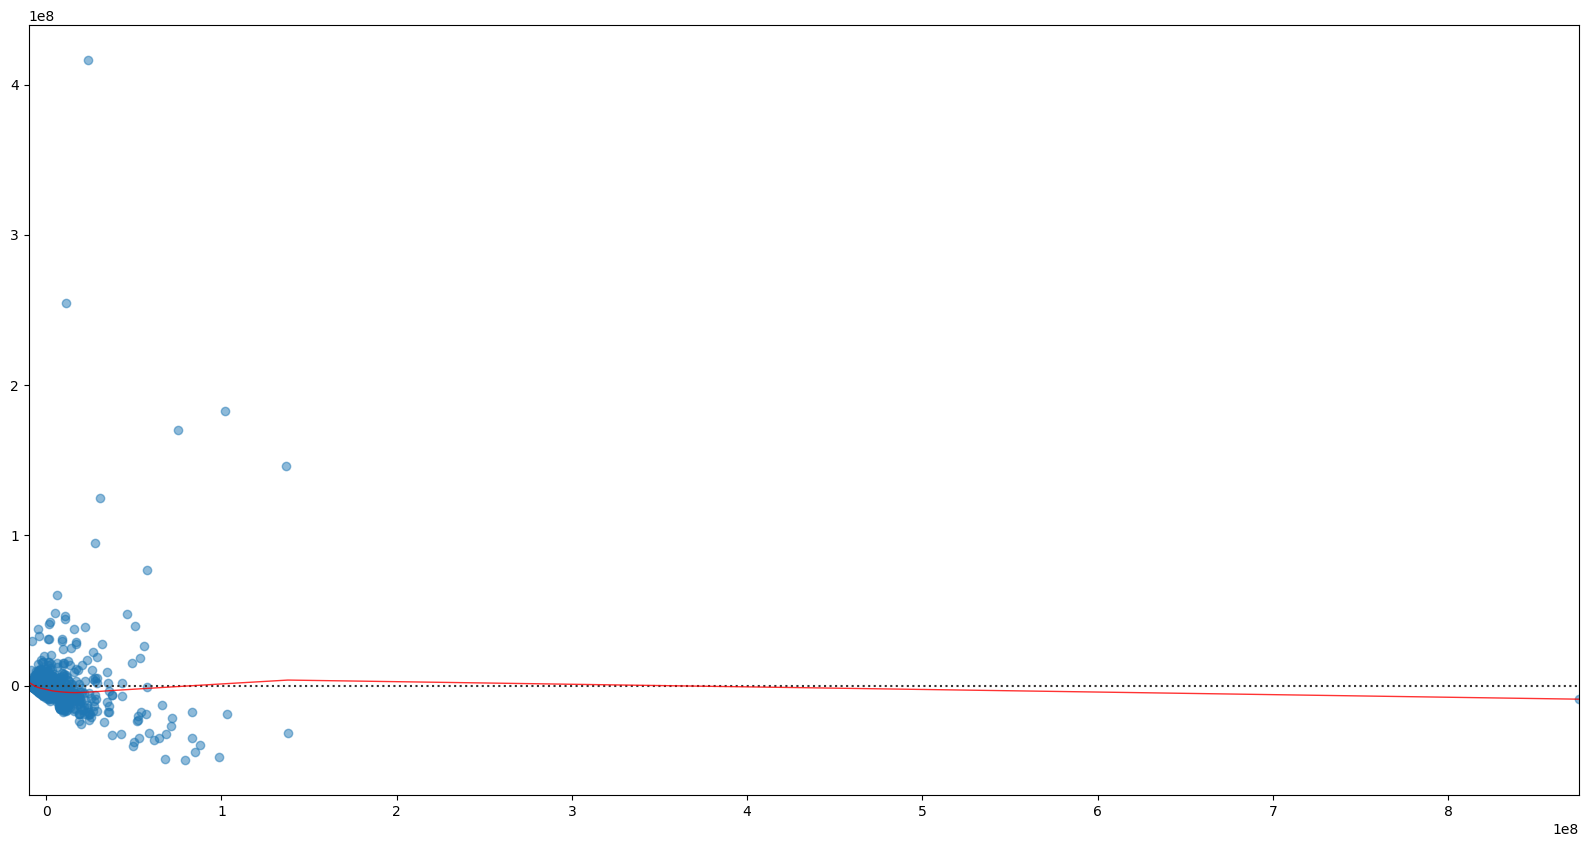

In [20]:
plt.figure(figsize=(20, 10))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})


Les points qui s'écarte de la courbe au fur et a mesure représente un modèle qui n'est pas homoscédastique

In [22]:

# Fit your linear regression model
model = sm.OLS(y1, X1).fit()

# Perform White's test for heteroscedasticity
white_test = het_white(model.resid, model.model.exog)

# Print the p-value from White's test
print("p-value from White's test:", white_test[1])


p-value from White's test: 3.980256244892663e-39


l'hypothèse nulle d'homoscédasticité est rejetée. 


### Normalité

Residuals are not normally distributed


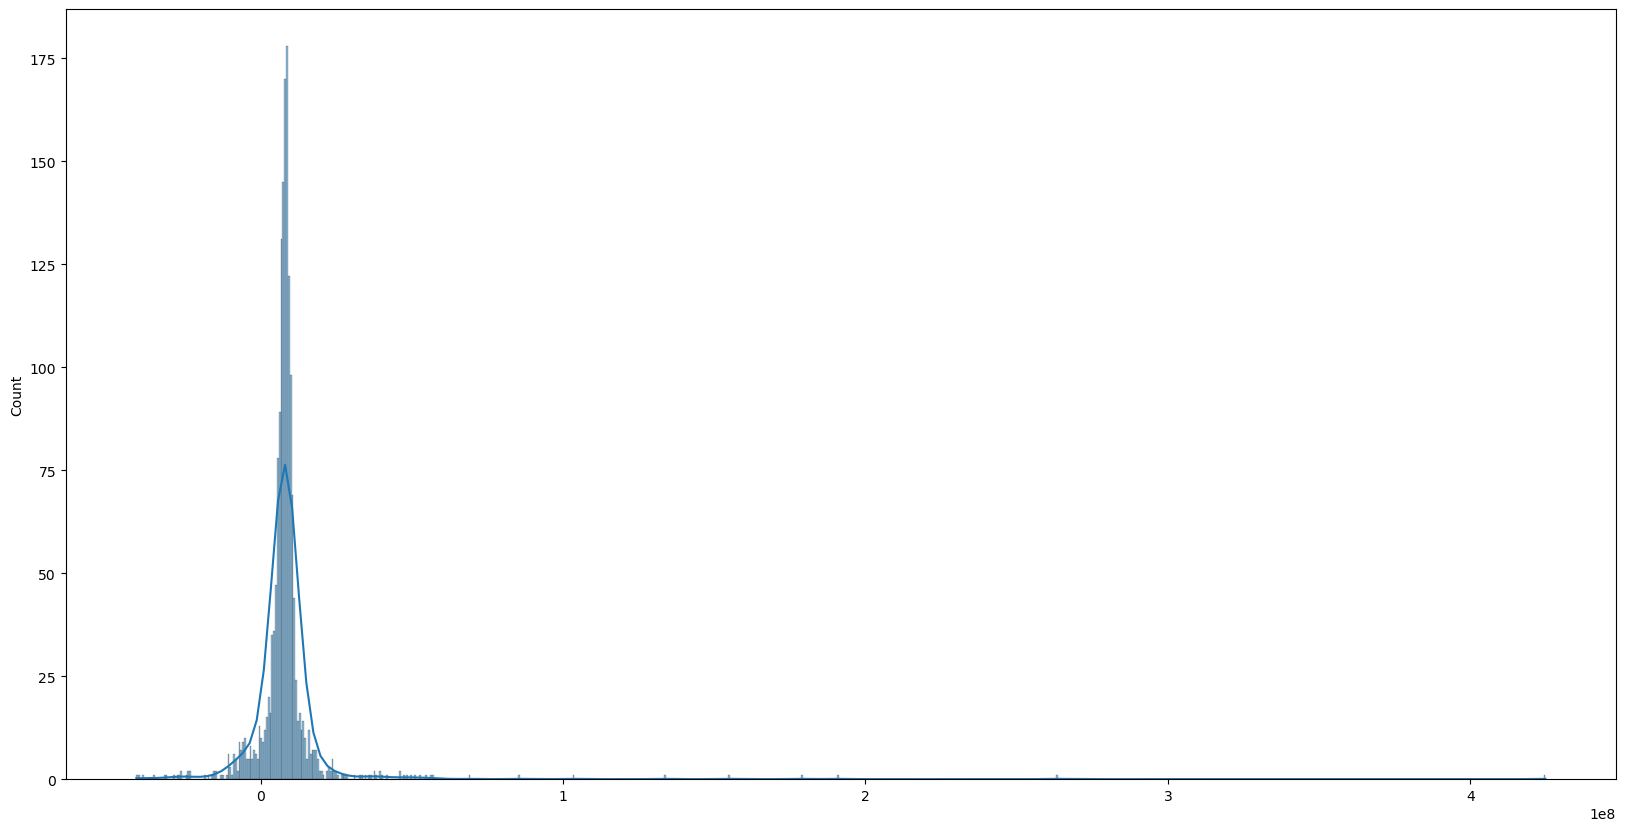

In [25]:
plt.figure(figsize=(20, 10))
sns.histplot(model.resid, kde=True)

#Shapiro-Wilk 

_, p = shapiro(model.resid)
if p < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')


loi normal non validé, la normalité de la distribution peut être un indicateur que le modèle fonctionne bien.

# Comparaison de différents modèles de prédiction 

# Regression lineaire 

In [27]:

# Séparation des variables d'entrée et de sortie
X = data2.drop(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)
y2 = data2['SiteEnergyUse(kBtu)']

# Séparation des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Définition du modèle de régression linéaire
lr = LinearRegression()

# Définition de la grille de paramètres
param_grid = {}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=kf, scoring='r2', n_jobs=-1)



# Entraînement et prédiction pour la variable de consommation d'énergie
start_time = time.time()
grid_search.fit(X_train, y2_train)
best_lr2 = grid_search.best_estimator_
y2_pred = best_lr2.predict(X_test)
r2_2 = r2_score(y2_test, y2_pred)
elapsed_time2 = time.time() - start_time
mse2 = mean_squared_error(y2_test, y2_pred)



# Affichage des résultats pour consommation d'énergie
results2linreg = pd.DataFrame({'Variable': ['SiteEnergyUse(kBtu)'],
                         'Modèle': ['Régression linéaire'],
                         'R^2': [r2_2],
                         'RMSE': [mse2 ** 0.5],
                         'MAE': [abs(y2_test - y2_pred).mean()],
                         'Temps d\'exécution': [elapsed_time2]})

In [28]:
results2linreg

,Variable,Modèle,R^2,RMSE,MAE,Temps d'exécution
0,SiteEnergyUse(kBtu),Régression linéaire,0.500481,1.609443e+07,5.405087e+06,1.833003


# XGBOOST

In [29]:
# Définition du modèle XGBoost
xgb_reg = xgb.XGBRegressor()

# Définition de la grille de paramètres
param_grid = {'n_estimators': [100, 500, 1000],
              'max_depth': [3, 5, 10],
              'learning_rate': [0.01, 0.1, 0.3],
              'min_child_weight': [1, 3, 5],
              'subsample': [0.5, 0.8, 1.0],
              'colsample_bytree': [0.5, 0.8, 1.0]}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb_reg, param_grid, cv=kf, scoring='r2', n_jobs=-1)



# Entraînement et prédiction pour la variable de consommation d'énergie
start_time = time.time()
grid_search.fit(X_train, y2_train)
best_xgb2 = grid_search.best_estimator_
y2_pred = best_xgb2.predict(X_test)
r2_2 = r2_score(y2_test, y2_pred)
elapsed_time2 = time.time() - start_time
mse2 = mean_squared_error(y2_test, y2_pred)


# Affichage des résultats pour consommation d'énergie
results2xgb = pd.DataFrame({'Variable': ['SiteEnergyUse(kBtu)'],
                         'Modèle': ['XGBoost'],
                         'R^2': [r2_2],
                         'RMSE': [mse2 ** 0.5],
                         'MAE': [abs(y2_test - y2_pred).mean()],
                         'Temps d\'exécution': [elapsed_time2]})

In [30]:
results2xgb

,Variable,Modèle,R^2,RMSE,MAE,Temps d'exécution
0,SiteEnergyUse(kBtu),XGBoost,0.359914,1.821876e+07,6.291897e+06,138.974074


# AdBoost

In [31]:
# Définition du modèle AdaBoost
ada_reg = AdaBoostRegressor()

# Définition de la grille de paramètres
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.3, 0.5]}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(ada_reg, param_grid, cv=kf, scoring='r2', n_jobs=-1)


# Entraînement et prédiction pour la variable de consommation d'énergie
start_time = time.time()
grid_search.fit(X_train, y2_train)
best_ada2 = grid_search.best_estimator_
y2_pred = best_ada2.predict(X_test)
r2_2 = r2_score(y2_test, y2_pred)
elapsed_time2 = time.time() - start_time
mse2 = mean_squared_error(y2_test, y2_pred)

# Affichage des résultats pour consommation d'énergie
results2ada = pd.DataFrame({'Variable': ['SiteEnergyUse(kBtu)'],
                         'Modèle': ['AdaBoost'],
                         'R^2': [r2_2],
                         'RMSE': [mse2 ** 0.5],
                         'MAE': [abs(y2_test - y2_pred).mean()],
                         'Temps d\'exécution': [elapsed_time2]})


In [32]:
results2ada

,Variable,Modèle,R^2,RMSE,MAE,Temps d'exécution
0,SiteEnergyUse(kBtu),AdaBoost,0.316612,1.882493e+07,6.044865e+06,0.987


# ElasticNet

In [33]:



# Définition du modèle Elastic Net
en = ElasticNet(random_state=42)

# Définition de la grille de paramètres
param_grid = {
    'alpha': [0.1, 0.5, 1, 5, 10], # Facteur de régularisation
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9] # Coefficient de mélange de la régularisation L1 et L2
}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(en, param_grid, cv=kf, scoring='r2', n_jobs=-1)


# Entraînement et prédiction pour la variable SiteEnergyUse
start_time = time.time()
grid_search.fit(X_train, y2_train)
best_en2 = grid_search.best_estimator_
y2_pred = best_en2.predict(X_test)
r2_2 = r2_score(y2_test, y2_pred)
elapsed_time2 = time.time() - start_time
mse2 = mean_squared_error(y2_test, y2_pred)
# Affichage des résultats


results2en = pd.DataFrame({'Variable': ['SiteEnergyUse(kBtu)'],
                        'Modèle': ['Elastic Net'],
                        'R^2': [r2_2],
                        'RMSE': [mse2 ** 0.5],
                        'MAE': [abs(y2_test - y2_pred).mean()],
                        'Temps d\'exécution': [elapsed_time2]})


In [34]:
results2en

,Variable,Modèle,R^2,RMSE,MAE,Temps d'exécution
0,SiteEnergyUse(kBtu),Elastic Net,0.500555,1.609324e+07,5.351732e+06,0.094998


# Randomn Forest

In [37]:
# Définition du modèle Random Forest
rf = RandomForestRegressor(random_state=42)

# Définition de la grille de paramètres
param_grid = {
    'n_estimators': [100, 200, 300], # Nombre d'arbres dans la forêt
    'max_depth': [5, 10, 20, None], # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10], # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4], # Nombre minimum d'échantillons requis dans chaque feuille
    'max_features': ['auto', 'sqrt'] # Nombre de features à considérer lors de la recherche de la meilleure séparation
}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=kf, scoring='r2', n_jobs=-1)


# Entraînement et prédiction pour la variable de consommation d'énergie
start_time = time.time()
grid_search.fit(X_train, y2_train)
best_rf2 = grid_search.best_estimator_
y2_pred = best_rf2.predict(X_test)
r2_2 = r2_score(y2_test, y2_pred)
elapsed_time1 = time.time() - start_time
mse2 = mean_squared_error(y2_test, y2_pred)


# Affichage des résultats pour consommation d'énergie
results2forest = pd.DataFrame({'Variable': ['SiteEnergyUse(kBtu)'],
                         'Modèle': ['Random Forest'],
                         'R^2': [r2_2],
                         'RMSE': [mse2 ** 0.5],
                         'MAE': [abs(y2_test - y2_pred).mean()],
                         'Temps d\'exécution': [elapsed_time1]})

In [38]:
results2forest

,Variable,Modèle,R^2,RMSE,MAE,Temps d'exécution
0,SiteEnergyUse(kBtu),Random Forest,0.540173,1.544177e+07,5.184939e+06,29.454016


# GradientBoostingRegressor

In [39]:
# Définition du modèle Gradient Boost
gb = GradientBoostingRegressor(random_state=42)

# Définition de la grille de paramètres
param_grid = {
    'n_estimators': [100, 200, 300], # Nombre d'estimateurs
    'learning_rate': [0.1, 0.05, 0.01], # Taux d'apprentissage
    'max_depth': [3, 5, 10], # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10], # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4], # Nombre minimum d'échantillons requis dans chaque feuille
    'max_features': ['auto', 'sqrt'] # Nombre de features à considérer lors de la recherche de la meilleure séparation
}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(gb, param_grid, cv=kf, scoring='r2', n_jobs=-1)


# Entraînement et prédiction pour la variable de consommation d'énergie
start_time = time.time()
grid_search.fit(X_train, y2_train)
best_gb2 = grid_search.best_estimator_
y2_pred = best_gb2.predict(X_test)
r2_2 = r2_score(y2_test, y2_pred)
elapsed_time2 = time.time() - start_time
mse2 = mean_squared_error(y2_test, y2_pred)


results2gb = pd.DataFrame({'Variable': ['SiteEnergyUse(kBtu)'],
                        'Modèle': ['Gradient Boost'],
                        'R^2': [r2_2],
                        'RMSE': [mse2 ** 0.5],
                        'MAE': [abs(y2_test - y2_pred).mean()],
                        'Temps d\'exécution': [elapsed_time2]})

In [40]:
results2gb

,Variable,Modèle,R^2,RMSE,MAE,Temps d'exécution
0,SiteEnergyUse(kBtu),Gradient Boost,0.606456,1.428553e+07,5.128797e+06,43.613023


# Lasso

In [41]:
# Définition du modèle Lasso
lasso = Lasso(random_state=42)

# Définition de la grille de paramètres
param_grid = {
    'alpha': [0.01, 0.1, 1, 10], # Hyperparamètre de régularisation L1
    'max_iter': [1000, 5000, 10000] # Nombre maximum d'itérations pour la convergence
}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(lasso, param_grid, cv=kf, scoring='r2', n_jobs=-1)


# Entraînement et prédiction pour la variable de consommation d'énergie
start_time = time.time()
grid_search.fit(X_train, y2_train)
best_lasso2 = grid_search.best_estimator_
y2_pred = best_lasso2.predict(X_test)
r2_2 = r2_score(y2_test, y2_pred)
elapsed_time2 = time.time() - start_time
mse2 = mean_squared_error(y2_test, y2_pred)


# Affichage des résultats pour consommation d'énergie
results2lasso = pd.DataFrame({'Variable': ['SiteEnergyUse(kBtu)'],
                         'Modèle': ['Lasso'],
                         'R^2': [r2_2],
                         'RMSE': [mse2 ** 0.5],
                          'MAE': [abs(y2_test - y2_pred).mean()],
                        'Temps d\'exécution': [elapsed_time2]})


In [42]:
results2lasso

,Variable,Modèle,R^2,RMSE,MAE,Temps d'exécution
0,SiteEnergyUse(kBtu),Lasso,0.500481,1.609443e+07,5.405078e+06,0.072


# Ridge

In [43]:
# Définition du modèle Ridge
ridge = Ridge(random_state=42)

# Définition de la grille de paramètres
param_grid = {
    'alpha': [0.01, 0.1, 1, 10], # Hyperparamètre de régularisation L2
    'max_iter': [1000, 5000, 10000] # Nombre maximum d'itérations pour la convergence
}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(ridge, param_grid, cv=kf, scoring='r2', n_jobs=-1)



# Entraînement et prédiction pour la variable de consommation d'énergie
start_time = time.time()
grid_search.fit(X_train, y2_train)
best_ridge2 = grid_search.best_estimator_
y2_pred = best_ridge2.predict(X_test)
r2_2 = r2_score(y2_test, y2_pred)
elapsed_time2 = time.time() - start_time
mse2 = mean_squared_error(y2_test, y2_pred)



# Affichage des résultats pour la consommation d'énergie
results2ridge = pd.DataFrame({'Variable': ['SiteEnergyUse(kBtu)'],
                              'Modèle': ['Ridge'],
                              'R^2': [r2_2],
                              'RMSE': [mse2 ** 0.5],
                              'MAE': [abs(y2_test - y2_pred).mean()],
                              'Temps d\'exécution': [elapsed_time2]})


In [44]:
results2ridge

,Variable,Modèle,R^2,RMSE,MAE,Temps d'exécution
0,SiteEnergyUse(kBtu),Ridge,0.500574,1.609294e+07,5.363923e+06,0.055


# Résultats

In [45]:
print("Résultats pour la variable SiteEnergyUse(kBtu) :")
results2 = pd.concat([results2linreg,results2en,results2xgb,results2ada , results2lasso, results2ridge, results2forest,results2gb])
results2

Résultats pour la variable SiteEnergyUse(kBtu) :


,Variable,Modèle,R^2,RMSE,MAE,Temps d'exécution
0,SiteEnergyUse(kBtu),Régression linéaire,0.500481,1.609443e+07,5.405087e+06,1.833003
0,SiteEnergyUse(kBtu),Elastic Net,0.500555,1.609324e+07,5.351732e+06,0.094998
0,SiteEnergyUse(kBtu),XGBoost,0.359914,1.821876e+07,6.291897e+06,138.974074
0,SiteEnergyUse(kBtu),AdaBoost,0.316612,1.882493e+07,6.044865e+06,0.987000
0,SiteEnergyUse(kBtu),Lasso,0.500481,1.609443e+07,5.405078e+06,0.072000
0,SiteEnergyUse(kBtu),Ridge,0.500574,1.609294e+07,5.363923e+06,0.055000
0,SiteEnergyUse(kBtu),Random Forest,0.540173,1.544177e+07,5.184939e+06,29.454016
0,SiteEnergyUse(kBtu),Gradient Boost,0.606456,1.428553e+07,5.128797e+06,43.613023


Gradient Boost est le modèle le plus performant 

# Application de energie star score 

In [70]:
data3 = data[['ENERGYSTARScore','YearBuilt','NumberofFloors','PropertyGFATotal','NumberofBuildings','SiteEnergyUse(kBtu)','TotalGHGEmissions','distance','Autre','Bureau','Commercial','Industrial','Santé','Scolaire','Hotel / Restaurant','Loisirs','Public','Residential','Service']]
data3

,ENERGYSTARScore,YearBuilt,NumberofFloors,PropertyGFATotal,NumberofBuildings,SiteEnergyUse(kBtu),TotalGHGEmissions,distance,Autre,Bureau,Commercial,Industrial,Santé,Scolaire,Hotel / Restaurant,Loisirs,Public,Residential,Service
0,60.0,1927,12,88434,1.0,7.226362e+06,249.98,1.480001,0,0,0,0,0,0,1,0,0,0,0
1,61.0,1996,11,103566,1.0,8.387933e+06,295.86,1.773875,0,0,0,0,0,0,1,0,0,0,0
2,43.0,1969,41,956110,1.0,7.258702e+07,2089.28,1.620355,0,0,0,0,0,0,1,0,0,0,0
3,56.0,1926,10,61320,1.0,6.794584e+06,286.43,1.706588,0,0,0,0,0,0,1,0,0,0,0
4,75.0,1980,18,175580,1.0,1.417261e+07,505.01,1.499523,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,46.0,1990,1,12294,1.0,8.497457e+05,20.94,4.940425,0,1,0,0,0,0,0,0,0,0,0
1655,NaN,2004,1,16000,1.0,9.502762e+05,32.17,2.263090,0,0,0,0,0,0,0,1,0,0,0
1656,NaN,1974,1,13157,1.0,5.765898e+06,223.54,3.803809,0,0,0,0,0,0,0,1,0,0,0
1657,NaN,1989,1,14101,1.0,7.194712e+05,22.11,8.496931,0,0,0,0,0,0,0,1,0,0,0


In [71]:
data4 = data3.dropna()
data4

,ENERGYSTARScore,YearBuilt,NumberofFloors,PropertyGFATotal,NumberofBuildings,SiteEnergyUse(kBtu),TotalGHGEmissions,distance,Autre,Bureau,Commercial,Industrial,Santé,Scolaire,Hotel / Restaurant,Loisirs,Public,Residential,Service
0,60.0,1927,12,88434,1.0,7.226362e+06,249.98,1.480001,0,0,0,0,0,0,1,0,0,0,0
1,61.0,1996,11,103566,1.0,8.387933e+06,295.86,1.773875,0,0,0,0,0,0,1,0,0,0,0
2,43.0,1969,41,956110,1.0,7.258702e+07,2089.28,1.620355,0,0,0,0,0,0,1,0,0,0,0
3,56.0,1926,10,61320,1.0,6.794584e+06,286.43,1.706588,0,0,0,0,0,0,1,0,0,0,0
4,75.0,1980,18,175580,1.0,1.417261e+07,505.01,1.499523,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,9.0,1929,2,24990,1.0,4.420650e+06,134.80,8.800523,0,1,0,0,0,0,0,0,0,0,0
1640,77.0,2015,3,45000,1.0,1.325973e+06,9.24,3.731941,0,0,0,0,0,1,0,0,0,0,0
1649,75.0,1952,1,13661,1.0,5.026677e+05,3.50,4.103350,0,1,0,0,0,0,0,0,0,0,0
1652,93.0,1960,1,15398,1.0,3.878100e+05,7.79,6.955618,0,1,0,0,0,0,0,0,0,0,0


ENERGYSTARScore contient beaucoup de valeur manquante, je les supprime car il est difficile de le calculer.

In [72]:
def scale_float_columns2(df):
    # Récupérer les colonnes ne contenant que des valeurs flottantes
    float_cols = data3[['ENERGYSTARScore','YearBuilt','NumberofFloors','PropertyGFATotal','NumberofBuildings','distance','Autre','Bureau','Commercial','Industrial','Santé','Scolaire','Hotel / Restaurant','Loisirs','Public','Residential','Service']]

    # Instancier le StandardScaler
    scaler = StandardScaler()

    # Mettre à l'échelle les colonnes de données flottantes
    scaled_values = scaler.fit_transform(float_cols)

    # Transformer les données mises à l'échelle en dataframe
    scaled_cols = pd.DataFrame(scaled_values, columns=float_cols.columns)

    # Remplacer les colonnes d'origine par les colonnes mises à l'échelle dans le dataframe d'origine
    df[float_cols.columns] = scaled_cols

In [73]:
scale_float_columns2(data4)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [74]:
data4

,ENERGYSTARScore,YearBuilt,NumberofFloors,PropertyGFATotal,NumberofBuildings,SiteEnergyUse(kBtu),TotalGHGEmissions,distance,Autre,Bureau,Commercial,Industrial,Santé,Scolaire,Hotel / Restaurant,Loisirs,Public,Residential,Service
0,-0.189472,-1.068757,1.289259,-0.101102,-0.068317,7.226362e+06,249.98,-1.021813,-0.371295,-0.656815,-0.322168,-0.435026,-0.243694,-0.338998,4.150996,-0.222117,-0.081699,-0.155158,-0.163122
1,-0.154373,1.041674,1.126433,-0.050044,-0.068317,8.387933e+06,295.86,-0.935773,-0.371295,-0.656815,-0.322168,-0.435026,-0.243694,-0.338998,4.150996,-0.222117,-0.081699,-0.155158,-0.163122
2,-0.786162,0.215853,6.011207,2.826576,-0.068317,7.258702e+07,2089.28,-0.980721,-0.371295,-0.656815,-0.322168,-0.435026,-0.243694,-0.338998,4.150996,-0.222117,-0.081699,-0.155158,-0.163122
3,-0.329870,-1.099343,0.963607,-0.192589,-0.068317,6.794584e+06,286.43,-0.955474,-0.371295,-0.656815,-0.322168,-0.435026,-0.243694,-0.338998,4.150996,-0.222117,-0.081699,-0.155158,-0.163122
4,0.337019,0.552299,2.266214,0.192943,-0.068317,1.417261e+07,505.01,-1.016098,-0.371295,-0.656815,-0.322168,-0.435026,-0.243694,-0.338998,4.150996,-0.222117,-0.081699,-0.155158,-0.163122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-1.979542,-1.007585,-0.339000,-0.315172,-0.068317,4.420650e+06,134.80,1.121480,-0.371295,1.522498,-0.322168,-0.435026,-0.243694,-0.338998,-0.240906,-0.222117,-0.081699,-0.155158,-0.163122
1640,0.407217,1.622807,-0.176174,-0.247655,-0.068317,1.325973e+06,9.24,-0.362493,-0.371295,-0.656815,-0.322168,-0.435026,-0.243694,2.949874,-0.240906,-0.222117,-0.081699,-0.155158,-0.163122
1649,0.337019,-0.304108,-0.501825,-0.353398,-0.068317,5.026677e+05,3.50,-0.253753,-0.371295,1.522498,-0.322168,-0.435026,-0.243694,-0.338998,-0.240906,-0.222117,-0.081699,-0.155158,-0.163122
1652,0.968808,-0.059420,-0.501825,-0.347537,-0.068317,3.878100e+05,7.79,0.581331,-0.371295,1.522498,-0.322168,-0.435026,-0.243694,-0.338998,-0.240906,-0.222117,-0.081699,-0.155158,-0.163122


In [75]:
# Séparation des variables d'entrée et de sortie
X11 = data4.drop(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)
y11 = data4['SiteEnergyUse(kBtu)']


# Séparation des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y1_train, y1_test, = train_test_split(X11, y11, test_size=0.2, random_state=42)

In [77]:
# Définition du modèle Gradient Boost
gb = GradientBoostingRegressor(random_state=42)

# Définition de la grille de paramètres
param_grid = {
    'n_estimators': [100, 200, 300], # Nombre d'estimateurs
    'learning_rate': [0.1, 0.05, 0.01], # Taux d'apprentissage
    'max_depth': [3, 5, 10], # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10], # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4], # Nombre minimum d'échantillons requis dans chaque feuille
    'max_features': ['auto', 'sqrt'] # Nombre de features à considérer lors de la recherche de la meilleure séparation
}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(gb, param_grid, cv=kf, scoring='r2', n_jobs=-1)


# Entraînement et prédiction pour la variable de consommation d'énergie
start_time = time.time()
grid_search.fit(X_train, y1_train)
best_gb2 = grid_search.best_estimator_
y1_pred = best_gb2.predict(X_test)
r2_2 = r2_score(y1_test, y1_pred)
elapsed_time2 = time.time() - start_time
mse2 = mean_squared_error(y1_test, y1_pred)


results2gb = pd.DataFrame({'Variable': ['SiteEnergyUse(kBtu)'],
                        'Modèle': ['Gradient Boost'],
                        'R^2': [r2_2],
                        'RMSE': [mse2 ** 0.5],
                        'MAE': [abs(y2_test - y2_pred).mean()],
                        'Temps d\'exécution': [elapsed_time2]})

In [78]:
results2gb

,Variable,Modèle,R^2,RMSE,MAE,Temps d'exécution
0,SiteEnergyUse(kBtu),Gradient Boost,0.70363,1.244035e+07,5.363923e+06,34.910018


La variable ENERGYSTARScore ameliore le modele 

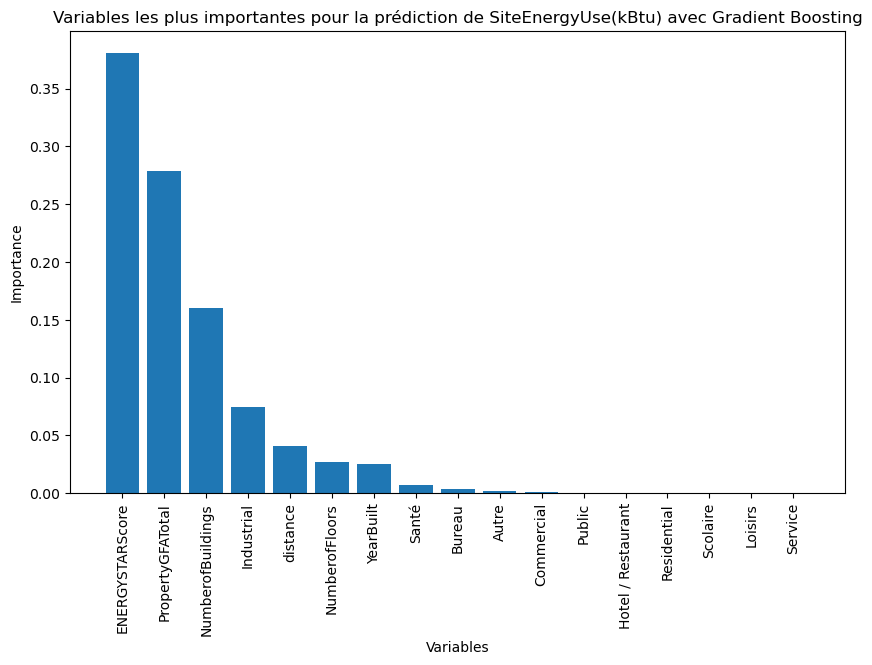

In [86]:
importance_df = pd.DataFrame(columns=['Variable', 'Importance'])  # Initialisation d'un DataFrame pour stocker les résultats d'importance des variables

# Modèle pour la variable d'émission de CO2
gb.fit(X_train, y1_train)
importance_df['Variable'] = X_train.columns
importance_df['Importance'] = gb.feature_importances_
importance_df.sort_values('Importance', ascending=False, inplace=True)  # Tri des variables par ordre d'importance
plt.figure(figsize=(10,6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.title('Variables les plus importantes pour la prédiction de SiteEnergyUse(kBtu) avec Gradient Boosting')
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.show()


Permutation explainer: 1091it [00:31, 24.47it/s]                          


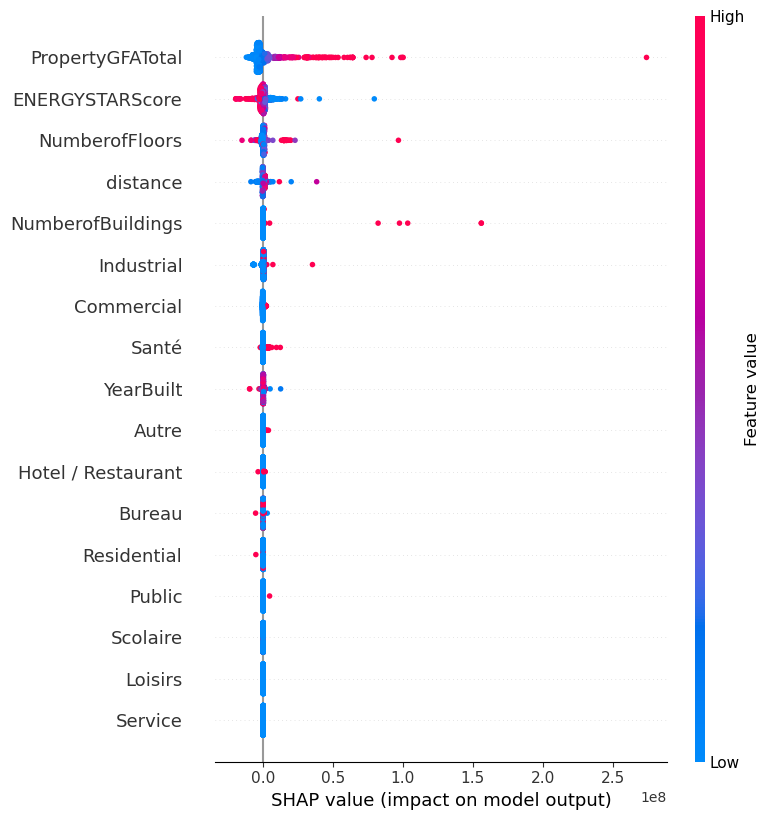

In [84]:
# Définition du modèle Ridge
gb = GradientBoostingRegressor(random_state=42)

# Entraînement du modèle
gb.fit(X11, y11)


# Calcul des valeurs de Shapley pour la variable  SiteEnergyUse(kBtu)
explainer1 = shap.Explainer(gb.predict, X11)
shap_values1 = explainer1(X11)
shap.summary_plot(shap_values1, X11)

# Conclusion


- Comparaison de différents modèles de prédiction.

- Le Grading Boost Regressor est le meilleur.

- On observe que l’ajout de la variable « ENERGYSTARScore » améliore les résultats pour la variable SiteEnergyUse(kBtu).


Axe d’amélioration :

Améliorer les valeurs manquantes de la variable ENERGYSTARScore